# IMPORT LIBRARIES

In [1]:
import pandas as pd # pandas allows to do a lot of basic data manipulation such as loading csv data files
import matplotlib.pyplot as plt # matplotlib is a basic ploting library of Python
import matplotlib.dates as mdates

# READ DATA

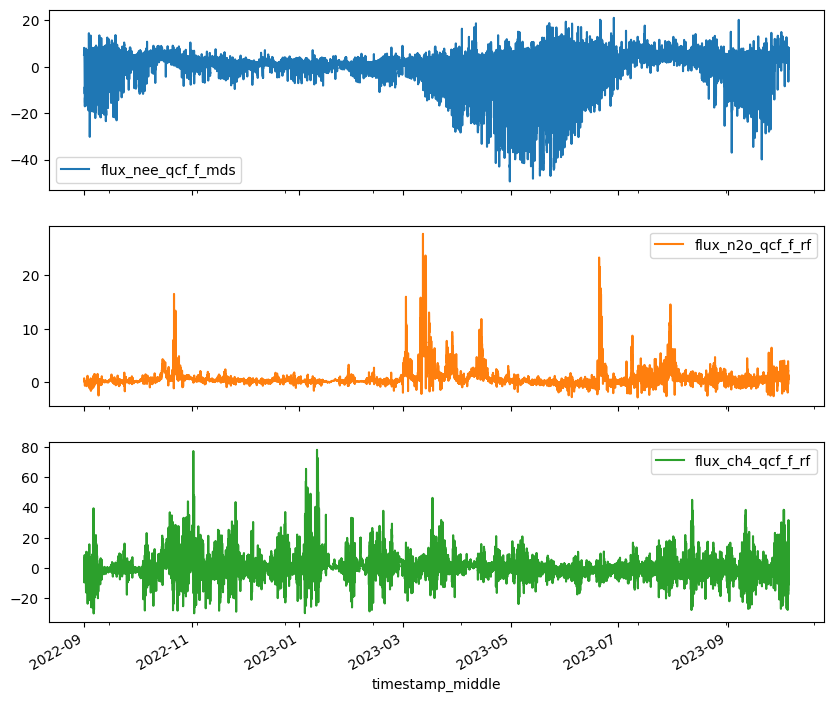

,flux_nee_qcf_f_mds,flux_n2o_qcf_f_rf,flux_ch4_qcf_f_rf,operation,wfps_0.15
timestamp_middle,,,,,
2022-09-01 00:15:00,5.221036,0.496789,-1.078365,NaN,22.400589
2022-09-01 00:45:00,5.270603,0.574461,-1.751478,NaN,22.394528
2022-09-01 01:15:00,8.111594,0.733034,-0.762119,NaN,22.370528
2022-09-01 01:45:00,6.371694,0.404464,-1.258747,NaN,22.361801
2022-09-01 02:15:00,5.461992,0.348086,-1.429250,NaN,22.315484
...,...,...,...,...,...
2023-10-05 10:15:00,6.244132,1.337405,31.687720,NaN,52.393574
2023-10-05 10:45:00,3.702135,0.782718,0.432940,NaN,52.366872
2023-10-05 11:15:00,4.164610,0.604505,1.899206,NaN,52.350544


In [2]:
time_resolution = '0.5' # set time resolution in hours
file_path = '../data/processed/DRIVERS_dataset_' + time_resolution + 'h.csv'
data = pd.read_csv(file_path, low_memory=False)
# Fix column names so all lower case, no spaces or special characters
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace(r'[^a-zA-Z0-9_]', '')
# Fix date to a datetime object
if time_resolution == '24':
    data['timestamp_middle'] = pd.to_datetime(data['timestamp_middle'], format='%Y-%m-%d')
else:
    data['timestamp_middle'] = pd.to_datetime(data['timestamp_middle'], format='%Y-%m-%d %H:%M:%S')
# Set timestamp as index
data.set_index('timestamp_middle', inplace=True)
# Select the columns we are interested
fluxes = ['flux_nee_qcf_f_mds', 'flux_n2o_qcf_f_rf', 'flux_ch4_qcf_f_rf']
#fluxes = ['flux_n2o_qcf0', 'flux_nee_qcf0', 'flux_ch4_qcf0']
data = data[fluxes + ['operation'] + ['wfps_0.15']]

# Set time interval
df = data['2022-09-01':'2023-10-05'].copy()

# Plot fluxes
df[fluxes].plot(figsize=(10,9), x_compat=True, subplots=True)
plt.show()

df


# AGGREGATE 

In [3]:
df_agg = pd.DataFrame()
incols = fluxes + ['wfps_0.15']
for col in incols:
    df_agg[col + '_mean'] = df[col].resample('D').mean()
    df_agg[col + '_sd'] = df[col].resample('D').std()

df_agg

,flux_nee_qcf_f_mds_mean,flux_nee_qcf_f_mds_sd,flux_n2o_qcf_f_rf_mean,flux_n2o_qcf_f_rf_sd,flux_ch4_qcf_f_rf_mean,flux_ch4_qcf_f_rf_sd,wfps_0.15_mean,wfps_0.15_sd
timestamp_middle,,,,,,,,
2022-09-01,-0.905879,8.252795,0.034220,0.272279,-1.501489,3.398432,21.929441,0.224400
2022-09-02,-1.424012,9.082453,-0.135646,0.294512,-5.802385,7.515752,21.262119,0.190929
2022-09-03,-0.555222,8.678768,-0.083467,0.271624,-3.981301,6.926456,21.163175,0.105813
2022-09-04,-1.338808,9.719246,-0.304020,0.446182,-4.961519,4.540793,20.866894,0.152885
2022-09-05,-0.817065,8.915992,-0.296622,0.360367,-6.230330,6.461015,20.297940,0.224194
...,...,...,...,...,...,...,...,...
2023-10-01,4.847115,2.219602,1.132251,0.825946,-3.630431,10.878432,54.743330,0.164615
2023-10-02,4.540771,1.819286,1.187532,1.035738,1.485300,13.003177,54.258860,0.094653
2023-10-03,4.493356,2.810301,1.304773,0.545263,2.180682,8.069946,53.812129,0.130422


# FIGURE

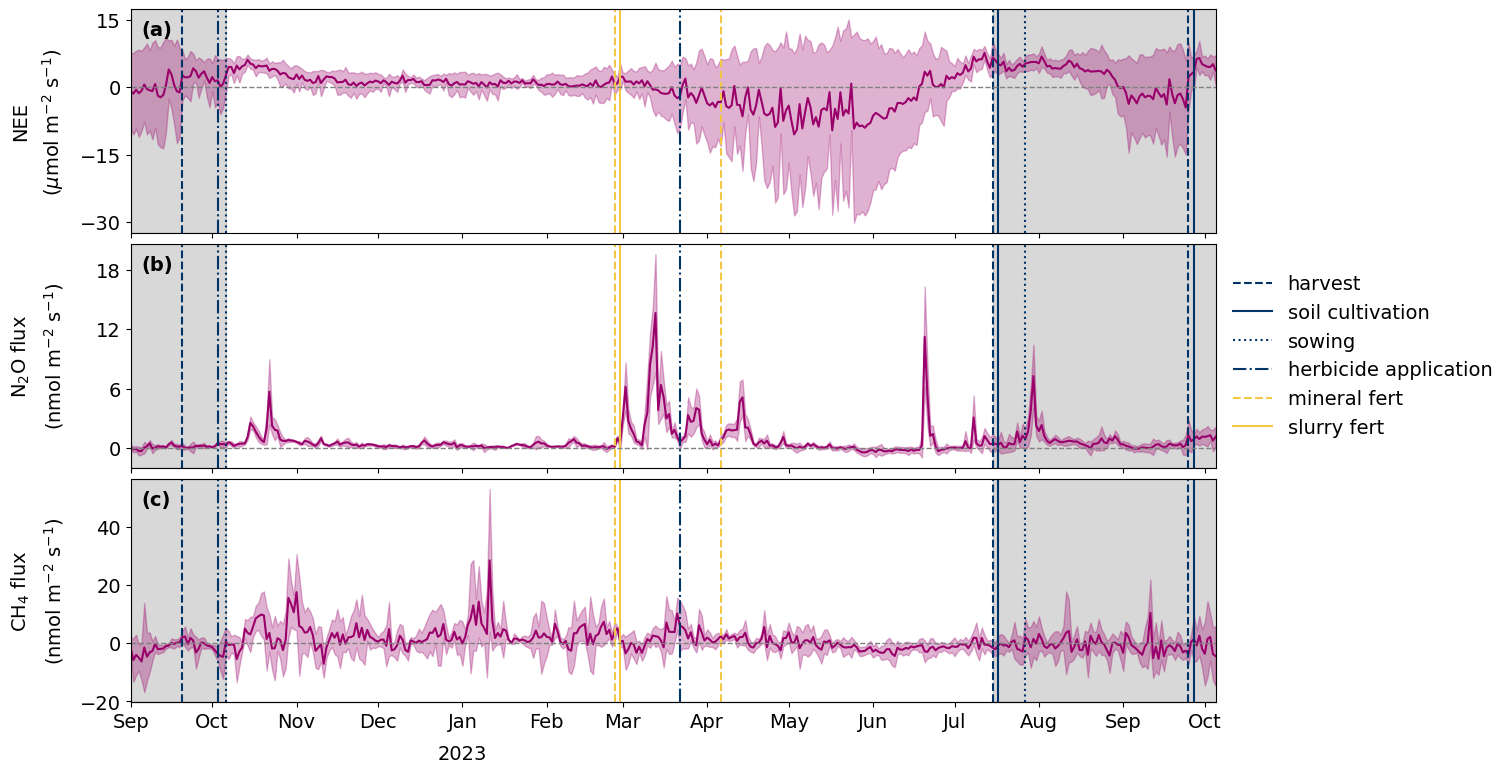

In [4]:
incols = fluxes

# Define the shading time window
highlight_start = pd.Timestamp('2022-10-06')
highlight_end = pd.Timestamp('2023-07-15')

# Subplot labels
subplot_labels = ['(a)', '(b)', '(c)']

# Create Plot
plt.rcParams.update({'font.size': 14})  # Set global font size
fig, axs = plt.subplots(len(incols), 1, sharex=True, figsize=(14, 3*len(incols)))
fig.subplots_adjust(hspace=0.05)  # ← removes vertical spacing

# Ensure axs is always an array
if len(incols) == 1:
    axs = [axs]

# Define labels and colors for the management events
#color1 = '#8b4513'
color1 = '#003366'
color2 = '#F2C744'
event_lines = [
    {'date': '2022-09-20', 'color': color1, 'linestyle': '--', 'label': 'harvest'},
    {'date': '2023-07-17', 'color': color1, 'linestyle': '-', 'label': 'soil cultivation'},
    {'date': '2022-10-06', 'color': color1, 'linestyle': ':', 'label': 'sowing'},
    {'date': '2022-10-03', 'color': color1, 'linestyle': '-.', 'label': 'herbicide application'},
    {'date': '2023-02-26', 'color': color2, 'linestyle': '--', 'label': 'mineral fert'},
    {'date': '2023-02-28', 'color': color2, 'linestyle': '-', 'label': 'slurry fert'},
    {'date': '2023-03-22', 'color': color1, 'linestyle': '-.', 'label': None}, # herbicide
    {'date': '2023-04-06', 'color': color2, 'linestyle': '--', 'label': None},  # second mineral fert
    {'date': '2023-07-15', 'color': color1, 'linestyle': '--', 'label': None},  # wheat harvest
    {'date': '2023-07-27', 'color': color1, 'linestyle': ':', 'label': None},  # sowing cover crop
    {'date': '2023-09-25', 'color': color1, 'linestyle': '--', 'label': None},   # mulching cover crop
    {'date': '2023-09-27', 'color': color1, 'linestyle': '-', 'label': None}   # soil cultivation
]

# Loop through each column and corresponding axis
for i, col in enumerate(incols):
    ax = axs[i]
    mean = df_agg[f'{col}_mean']
    err = df_agg[f'{col}_sd']
    
    # Plot mean and error
    ax.fill_between(df_agg.index, mean - err, mean + err, color="#9A006A", alpha=0.3)
    ax.plot(df_agg.index, mean, color="#9A006A")

    # Plot vertical lines for events
    for event in event_lines:
        ax.axvline(pd.to_datetime(event['date']), 
                   color=event['color'], 
                   linestyle=event['linestyle'], 
                   label=event['label'])

    # Customize plot
    if 'n2o' in col:
        ax.set_ylabel('N$_2$O flux\n(nmol m$^{-2}$ s$^{-1}$)', labelpad=10, linespacing=1.5)
    elif 'nee' in col:
        ax.set_ylabel('NEE\n($\mu$mol m$^{-2}$ s$^{-1}$)', labelpad=10, linespacing=1.5)
    else:
        ax.set_ylabel('CH$_4$ flux\n(nmol m$^{-2}$ s$^{-1}$)', labelpad=10, linespacing=1.5)
        
    ax.axhline(y=0, color='grey', linestyle='--', lw=1)

    # Add subplot label 
    ax.text(0.01, 0.95, subplot_labels[i], transform=ax.transAxes, fontweight='bold', verticalalignment='top')

    # Add shading to highlight a certain time window
    ax.axvspan(df.index.min(), highlight_start, color='gray', alpha=0.3, zorder=0)
    ax.axvspan(highlight_end, df.index.max(), color='gray', alpha=0.3, zorder=0)
    # Reduce y axis ticks
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# Add legend for event lines
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)  # Adjust legend position as needed
    
# Format x-axis for months
axs[-1].xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for months
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as month abbreviation

# Add secondary x-axis for years
secax = axs[-1].secondary_xaxis('bottom')
secax.xaxis.set_major_locator(mdates.YearLocator())  # Year ticks
secax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year
secax.tick_params(axis='x', length=0, pad=30)  # Add padding for better readability

# Set x-axis limits to match data range --> to prevent white spaces
for ax in axs:
    ax.set_xlim(df_agg.index.min(), df_agg.index.max())

# Aligns the left y-axis labels vertically
fig.align_ylabels(axs)

# Save the figure
plt.savefig('../figures/CO2_N2O_CH4_fluxes.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()